## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import math
import scipy.interpolate
import scipy.stats
%matplotlib inline

## DNC: Begin Part 1: Descriptive Statistics 

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

In [3]:
#Creating a numpy array that has 10 uniform random numbers between 25.0 and 35.0
A = np.random.uniform(low = 25, high = 35, size = 10)

#Creating pandas dataframe with one frame based on the numpy array above
df = pd.DataFrame(A)


The problem then says to use the np.std and pd.std formulas to calculate the standard deviaiton. I will only use the np.std formula. Comparing them together later on did not work because pandas and numpy compute the standard deviation differently, so even with the technique I used below to generate the same random numbers, the standard deviations were still different.

In [7]:
#Standard Deviation using np.std
np.std(df)

0    3.072244
dtype: float64

In [6]:
#Standard Deviation using pd.std
df.std()

0    3.238429
dtype: float64

The values of the standard deviations above are diffent because the fucntions np.std and pd.std calculate the standard deviation slightly differently

In [8]:
#Creating a numpy array that has 1E6 uniform random numbers between 25.0 and 35.0
B = np.random.uniform(low = 25, high = 35, size = int(1E6))

#Creating pandas dataframe with one frame based on the numpy array above
df2 = pd.DataFrame(B)


In [13]:
#Standard Deviation using np.std
np.std(df2[0])

2.88408905393541

In [15]:
#Standard deviation using pd.std
df2.std()[0]

2.884090495981018

 If you were to round up they would both be the same number, unlike before with only 10 random numbers. However they are still different. I believe this is due to the fact that the sample size is orders of magnitude larger compared to the previous excercise. With a such a large sample size, there is a greater chance for both sets of numbers to be more similar. 

Since the default options for np.std and pd.std calculate the standard deviation slightly differently, we need to make ddof = 1 in the np.std in order to obtain the same answer.

In [18]:
mod_np_std = np.std(df2[0], ddof = 1)

mod_np_std

2.884090495981018

Note this now gives the same exact value as using pd.std in cell 10 above

In [19]:
#Loading Gerberding data
df4 = pd.read_csv('GerberdingElectricityChilledWater.csv')

df4.head()

,DateTime,Btu,kWh
0,1/1/13 0:15,49664.0,19.69
1,1/1/13 0:30,90112.0,20.84
2,1/1/13 0:45,19968.0,17.42
3,1/1/13 1:00,50176.0,19.59
4,1/1/13 1:15,99840.0,20.46


In [20]:
df4.describe()

,Btu,kWh
count,4.999800e+04,49998.000000
mean,6.142801e+04,18.673828
std,3.378179e+04,14.736762
min,0.000000e+00,-71.682969
25%,3.993600e+04,15.900000
50%,5.017600e+04,18.080000
75%,7.987200e+04,26.117500
max,2.070016e+06,51.010000


If we notice the description of the data above, the minimum value for electricity usage is negative. Unless they were producing their own electricity, this value cannot be negative. I will not modify the original data set, but I will just cut off the minimum on the y-axis at zero. Also, the minimum energy usage was zero, however it is likely no heat/hot water was used int he building during this time.

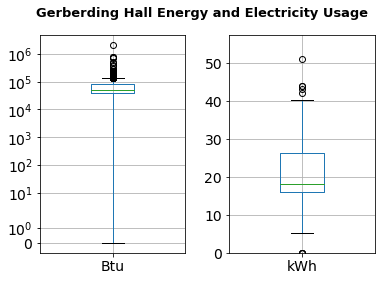

In [21]:
fig = plt.figure
plt.suptitle('Gerberding Hall Energy and Electricity Usage', fontsize = 13, fontweight = 'bold')

plt.subplot(1,2,1)
df4.boxplot(column = ['Btu'], fontsize = 14, widths = 0.3)
plt.yscale('symlog')

plt.subplot(1,2,2)
df4.boxplot(column = ['kWh'], fontsize = 14, widths = 0.3)
plt.ylim(bottom = 0)

fig = plt.subplots_adjust( wspace = 0.3, hspace = 0.3)

## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


mean of the chilled water data series

In [22]:
mean_energy = df4['Btu'].mean()

mean_energy


61428.009943278536

std of the chilled water data series

In [23]:
std_energy = df4['Btu'].std()

std_energy

33781.789676409906

Creating the PDF based on the mean and standard deviation of chilled water data series. I used the mlab.normpdf fucntion

In [24]:
x = np.linspace(mean_energy - 3*std_energy, mean_energy + 3*std_energy, 5000) #x axis of distribution plot. 3*sigma away from mean should hopefully capture most of the data.
PDF = mlab.normpdf(x, mean_energy, std_energy)

/Users/studentuser/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


To start creating the measured CDF and CDF from the normal distribution of the data, I have imported the inverse CDF function created in the L4 Distributions ntoebook.

In [25]:
def inverse_cdf(data, bins):
    hist_data, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges)
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins)
    
    return [cdf, inv_cdf]

Creating the CDF for the normal distribution of data

In [26]:
norm_dist = np.random.normal(mean_energy, std_energy, 500000)
[cdf_norm, inv_cdf] = inverse_cdf(norm_dist, 100) #when plotting this, use x above in cell 64

Creating the measured CDF

In [27]:
[cdf_measured, inv_cdf] = inverse_cdf(df4['Btu'], 100)
y = np.linspace(0, max(x), 10000) 

Now I will incorporate all of this into the plots

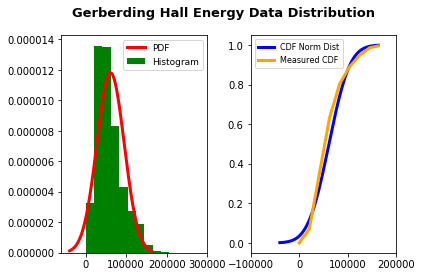

In [28]:
fig = plt.figure
plt.suptitle('Gerberding Hall Energy Data Distribution', fontsize = 13, fontweight = 'bold')

plt.subplot(1, 2, 1)
plt.hist(df4['Btu'], bins = 100, density = True, color = 'green')
plt.plot(x, PDF, color = 'red', linewidth = 3)
plt.xlim(right = 300000, left = -60000)
plt.legend(['PDF', 'Histogram'], loc = 0, prop={'size': 9})

plt.subplot(1, 2, 2)
plt.plot(x, cdf_norm(x), color = 'blue', linewidth = 3)
plt.plot(y, cdf_measured(y), color = 'orange', linewidth = 3)
plt.legend(['CDF Norm Dist', 'Measured CDF'], loc = 2, prop={'size': 8})
plt.xlim(right = 200000, left = -100000)

fig = plt.subplots_adjust( wspace = 0.3, hspace = 0.3)

This process was repeated for the elctricity data

In [29]:
mean_elec = df4['kWh'].mean()

mean_elec


18.673827553060203

In [30]:
std_elec = df4['kWh'].std()

std_elec

14.736762424483148

In [31]:
x = np.linspace(mean_elec - 3*std_elec, mean_elec + 3*std_elec, 5000) 
PDF = mlab.normpdf(x, mean_elec, std_elec)

/Users/studentuser/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


Initially I did not re-include the inverse_cdf function, but I kept getting an error that said "A value in x_new is above the interpolation range". I couldn't figure out how to solve it, so I stackoverflowed the error and a solution was to add 'fill_value = 'extrapolate'' into the .interp1d space. This fixed my error.

In [32]:
def inverse_cdf(data, bins):
    hist_data, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf_bins = np.cumsum(hist_data * np.diff(bin_edges))
    cdf_bins = np.insert(cdf_bins, 0, 0)
    
    inv_cdf = scipy.interpolate.interp1d(cdf_bins, bin_edges, fill_value = 'extrapolate')  
    cdf = scipy.interpolate.interp1d(bin_edges, cdf_bins, fill_value = 'extrapolate')
    
    return [cdf, inv_cdf]

In [33]:
norm_dist = np.random.normal(mean_elec, std_elec, 500000)
[cdf_norm, inv_cdf] = inverse_cdf(norm_dist, 100) 

In [34]:
[cdf_measured, inv_cdf] = inverse_cdf(df4['kWh'], 500)
y = np.linspace(0, max(x), 10000) 

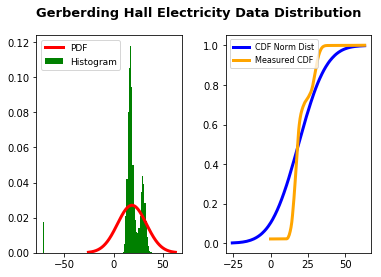

In [35]:
fig = plt.figure
plt.suptitle('Gerberding Hall Electricity Data Distribution', fontsize = 13, fontweight = 'bold')

plt.subplot(1, 2, 1)
plt.hist(df4['kWh'], bins = 100, density = True, color = 'green')
plt.plot(x, PDF, color = 'red', linewidth = 3)
plt.legend(['PDF', 'Histogram'], loc = 0, prop={'size': 9})

plt.subplot(1, 2, 2)
plt.plot(x, cdf_norm(x), color = 'blue', linewidth = 3)
plt.plot(y, cdf_measured(y), color = 'orange', linewidth = 3)
plt.legend(['CDF Norm Dist', 'Measured CDF'], loc = 2, prop={'size': 8})

fig = plt.subplots_adjust( wspace = 0.3, hspace = 0.3)

## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

In [42]:
energyuse = pd.read_csv('energyuse.csv')

energyuse

,Group,Lighting,Electricity,Total
0,A,0.451,1.270,1.721
1,B,1.033,1.769,2.801
2,C,0.410,1.629,2.040
3,D,0.708,1.633,2.341
4,E,2.317,0.725,3.042
5,F,1.601,0.634,2.235
6,National Avg,1.760,1.280,3.040


In [43]:
# Excluding the national average from the UW students data
UW = energyuse.drop ([6])

UW

,Group,Lighting,Electricity,Total
0,A,0.451,1.270,1.721
1,B,1.033,1.769,2.801
2,C,0.410,1.629,2.040
3,D,0.708,1.633,2.341
4,E,2.317,0.725,3.042
5,F,1.601,0.634,2.235


I hypothesize that the mean energy usage of UW students in each category is higher than the national average, possibly due to the lack of sunshine Seattle experiences. 

In [49]:
mean_lighting = UW['Lighting'].mean()

national_lighting = energyuse.iloc[6][1]

In [50]:
mean_electricity = UW['Electricity'].mean()

national_electricity = energyuse.iloc[6][2]

In [51]:
mean_total = UW['Total'].mean()

national_total = energyuse.iloc[6][3]

In [52]:
# Testing the hypothesis for Lighting
scipy.stats.ttest_1samp(UW['Lighting'], national_lighting)

Ttest_1sampResult(statistic=-2.2093421837450697, pvalue=0.07816916049324209)

For the lighting, the pvalue is 0.078 which is just a tad bit greater than our significance value of 0.05. This means that we are unable to go ahead and reject the null hypothesis, which is the hypothesis that states there is no signficant difference between the data. 

In [53]:
# Testing the hypothesis for Electricity
scipy.stats.ttest_1samp(UW['Electricity'], national_electricity)

Ttest_1sampResult(statistic=-0.016591447480117566, pvalue=0.9874042445399441)

The pvalue for this test is 0.987, which once again is greater than 0.05 and we are unable to reject the null hypothesis.

In [54]:
#Testing the hypothesis for Totals
scipy.stats.ttest_1samp(UW['Total'], national_total)

Ttest_1sampResult(statistic=-3.4028918925369513, pvalue=0.01919071796945489)

Here, the pvalue is 0.019 which is indeed less than our significance value of 0.05. In this case, we are able to reject the null hypothesis and state that with 95% confidence, there is a singificant statistical difference between the data. This does not prove our hypothesis that the mean total energy usage of UW students is greater than the national mean, but that it has a greater chance of being correct. 